# Implementation of Perceptron

In [1]:
%pip install numpy pandas matplotlib pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-dtckufa2/pytorch_0faea5b5c3174ef48c961d4a2dbd5a1c/setup.py", line 15, in <module>
          raise Exception(message)
      Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  Running setup.py install for pytorch ... error
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exit co

In [2]:
%pip install watermark

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.7.0

numpy     : 1.23.5
pandas    : 1.5.2
matplotlib: 3.6.2



In [4]:
import random
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Visualization

In [5]:
df = pd.read_csv("../Unit1/data/perceptron-toydata-truncated.txt", sep="\t")
df.head()

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [6]:
x_train = torch.from_numpy(df[["x1", "x2"]].values).to(torch.float32)
y_train = torch.from_numpy(df["label"].values).to(torch.float32)

x_train

tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-0.6300, -1.5300],
        [ 0.3900, -1.9900],
        [-0.4900, -2.7400],
        [-0.6800, -1.5200],
        [-0.1000, -3.4300],
        [-0.0500, -1.9500],
        [ 3.8800,  0.6500],
        [ 0.7300,  2.9700],
        [ 0.8300,  3.9400],
        [ 1.5900,  1.2500],
        [ 1.1400,  3.9100],
        [ 1.7300,  2.8000],
        [ 1.3100,  1.8500],
        [ 1.5600,  3.8500],
        [ 1.2300,  2.5400],
        [ 1.3300,  2.0300]])

In [7]:
print(x_train.shape, y_train.shape)

torch.Size([20, 2]) torch.Size([20])


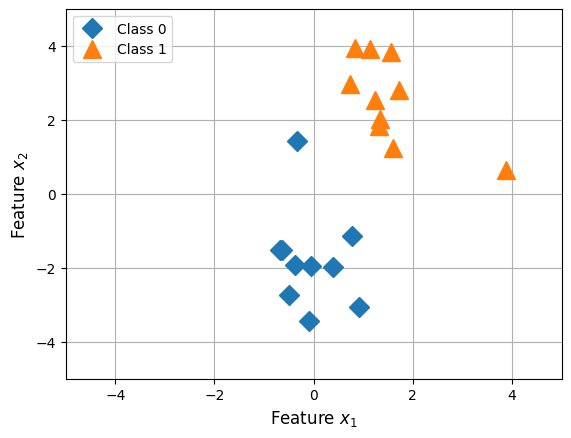

In [8]:
plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

## Building a Perceptron using NumPy

In [9]:

from typing import List

class Perceptron:
    def __init__(self, num_features: int, learning_rate: float = 0.5) -> int:
        self.num_features: int = num_features
        self.weights: List[float] = torch.zeros(num_features)
        self.bias: torch.Tensor = torch.tensor(0.0)
        self.learning_rate: float = torch.tensor(learning_rate)
    
    def forward(self, observations: List[float]) -> None:

        weighted_sum: float = torch.matmul(torch.Tensor(observations), self.weights) + self.bias
        if weighted_sum > 0.0:
            return torch.tensor(1.0)

        return torch.tensor(0.0)
    
    def update(self, features: List[float], true_label: int) -> float:
        prediction: float = self.forward(features)
        error: float = torch.tensor(true_label - prediction)
        # update
        self.bias = self.bias + self.learning_rate + error
        self.weights = self.weights + error * torch.Tensor(features)
        
        return error

In [10]:
perceptron = Perceptron(num_features = 2)
print(perceptron.weights, perceptron.bias)

observations: List[float] = [1.1, 2.1]
perceptron.update(features=observations, true_label=1)

tensor([0., 0.]) tensor(0.)


/tmp/ipykernel_18813/1919575364.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  error: float = torch.tensor(true_label - prediction)


tensor(1.)

## Training Perceptron

In [11]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count: int = 0
        for x, y, in zip(all_x, all_y):
            error: float = model.update(x, y)
            error_count = error_count + abs(error)
        
        print(f"Epoch {epoch+1} - Errors: {error_count}")

In [17]:
perceptron = Perceptron(num_features = 2, learning_rate=0.001)
train(model=perceptron, all_x=x_train, all_y=y_train, epochs=5)

Epoch 1 - Errors: 3.0
Epoch 2 - Errors: 1.0
Epoch 3 - Errors: 0.0
Epoch 4 - Errors: 0.0
Epoch 5 - Errors: 0.0


/tmp/ipykernel_18813/1919575364.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  error: float = torch.tensor(true_label - prediction)


In [18]:
print("Model parameters: ")
print(f"    Weights: {perceptron.weights}")
print(f"    Bias: {perceptron.bias}")

Model parameters: 
    Weights: tensor([3.6300, 0.8400])
    Bias: -1.899996042251587


## Evaluating the results

In [19]:
def compute_accuracy(model, all_x, all_y) -> float:
    correct: float = 0.0

    for x, y in zip(all_x, all_y):
        prediction: int = model.forward(x)
        correct = correct + int(prediction == y)

    return correct/len(all_y)

training_accuracy: float = compute_accuracy(perceptron, x_train, y_train)

print(f"Accuracy: {training_accuracy * 100}")

Accuracy: 100.0


## Visualizing the decision boundary

In [20]:
def plot_boundary(model):
    w1, w2 = model.weights[0], model.weights[1]
    b = model.bias

    x1_min = -20
    x2_min = (-(w1 * x1_min) -b) / w2
    x1_max = 20
    x2_max = (-(w1 * x1_max) -b) / w2

    return x1_min, x1_max, x2_min, x2_max

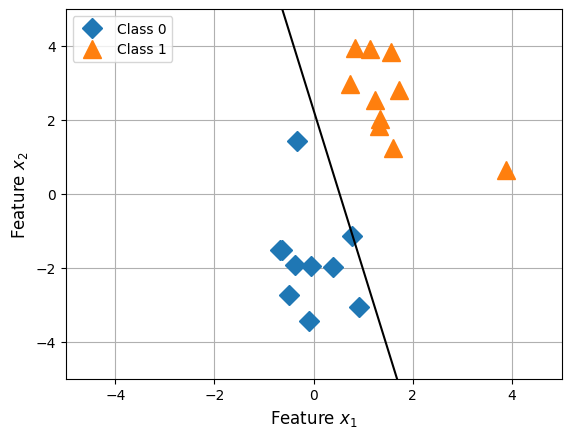

In [21]:

x1_min, x1_max, x2_min, x2_max = plot_boundary(perceptron)


plt.plot(
    x_train[y_train == 0, 0],
    x_train[y_train == 0, 1],
    marker = "D",
    markersize = 10,
    linestyle = "",
    label = "Class 0"
)

plt.plot(
    x_train[y_train == 1, 0],
    x_train[y_train == 1, 1],
    marker = "^",
    markersize = 13,
    linestyle = "",
    label = "Class 1"
)

plt.plot([x1_min, x1_max], [x2_min, x2_max], color="k")
plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()